In [1]:
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
from datetime import datetime

In [5]:
!pwd

/Users/manishb-imac/Documents/personal-repos/ml-tutorials/notebooks/working_with_dates


In [6]:
!ls

orders-code.ipynb orders_data.csv


In [7]:
!head -5 orders_data.csv

In [8]:
raw_file = pd.read_csv('orders_data.csv')
raw_file.head()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,07/04/15 15:39,12/15/15 14:42,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,6/26/15 9:56,12/09/15 20:45,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,07/01/15 1:51,12/14/15 1:43,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,07/11/15 18:34,12/19/15 23:26,182,4.0,23.0,85150,1738,9958,2.4,36


In [9]:
raw_file.shape

(10000, 11)

In [10]:
# edit the column names
raw_file.columns = [i.lower().replace(' ', '_').replace('#', 'no.') for i in raw_file.columns]

In [11]:
raw_file.dtypes

customer_id                        int64
first_time                        object
recent_time                       object
no._of_orders                      int64
no._of_orders_in_last_7_days     float64
no._of_orders_in_last_4_weeks    float64
amount                             int64
amount_in_last_7_days              int64
amount_in_last_4_weeks             int64
avg_distancefromresturant        float64
avg_deliverytime                   int64
dtype: object

In [12]:
# converting to datetime type using to_datetime function in pandas
raw_file['first_time'] = pd.to_datetime(raw_file['first_time'])
raw_file['recent_time'] = pd.to_datetime(raw_file['recent_time'])

In [13]:
min(raw_file.first_time)
max(raw_file.first_time)

Timestamp('2015-06-05 17:21:00')

Timestamp('2016-01-07 12:42:00')

In [14]:
raw_file.isna().sum() 
# no. of order for last 7 days and last 4 weeks are missing in huge percent

customer_id                         0
first_time                          0
recent_time                         0
no._of_orders                       0
no._of_orders_in_last_7_days     8077
no._of_orders_in_last_4_weeks    5659
amount                              0
amount_in_last_7_days               0
amount_in_last_4_weeks              0
avg_distancefromresturant           0
avg_deliverytime                    0
dtype: int64

In [15]:
# let us subset data to include only date columns as we only plan to work on dates column
raw_data = raw_file.loc[:, ['first_time', 'recent_time']].copy(deep=True)
raw_data.head()

,first_time,recent_time
0,2015-06-29 10:57:00,2015-12-10 02:18:00
1,2015-07-04 15:39:00,2015-12-15 14:42:00
2,2015-06-26 09:56:00,2015-12-09 20:45:00
3,2015-07-01 01:51:00,2015-12-14 01:43:00
4,2015-07-11 18:34:00,2015-12-19 23:26:00


In [16]:
# create a new feature by taking the difference between the date columns
date_diff = raw_data.recent_time - raw_data.first_time
raw_data['membership_days'] = date_diff.apply(func = lambda x: x.days)
raw_data.head()

,first_time,recent_time,membership_days
0,2015-06-29 10:57:00,2015-12-10 02:18:00,163
1,2015-07-04 15:39:00,2015-12-15 14:42:00,163
2,2015-06-26 09:56:00,2015-12-09 20:45:00,166
3,2015-07-01 01:51:00,2015-12-14 01:43:00,165
4,2015-07-11 18:34:00,2015-12-19 23:26:00,161


In [17]:
# extract just the first order date
raw_data['first_order_date'] = raw_data['first_time'].apply(func= lambda x: str(x).split(' ')[0])

# extract the most recent-order date and time
raw_data['recent_order_date'] = raw_data['recent_time'].apply(func= lambda x: str(x).split(' ')[0])
raw_data['recent_order_time'] = raw_data['recent_time'].apply(func= lambda x: str(x).split(' ')[1])


In [18]:
raw_data.head()

,first_time,recent_time,membership_days,first_order_date,recent_order_date,recent_order_time
0,2015-06-29 10:57:00,2015-12-10 02:18:00,163,2015-06-29,2015-12-10,02:18:00
1,2015-07-04 15:39:00,2015-12-15 14:42:00,163,2015-07-04,2015-12-15,14:42:00
2,2015-06-26 09:56:00,2015-12-09 20:45:00,166,2015-06-26,2015-12-09,20:45:00
3,2015-07-01 01:51:00,2015-12-14 01:43:00,165,2015-07-01,2015-12-14,01:43:00
4,2015-07-11 18:34:00,2015-12-19 23:26:00,161,2015-07-11,2015-12-19,23:26:00


In [19]:
# drop first_time and recent_time and first_order_date columns
raw_data.drop(labels=['first_order_date', 'first_time', 'recent_time'], axis=1, inplace=True)

### Create new features from date column

In [20]:
# get month, day, year, weekday from a date
d = '2018-10-10'
# convert a string to datetime object
d_date_obj = datetime.strptime(d, '%Y-%m-%d')
d_date_obj

# get year
d_date_obj.year

# get month
d_date_obj.year

# get day
d_date_obj.day

# get weekday
# 1 is Monday, 7 is Sunday
d_date_obj.isoweekday()

datetime.datetime(2018, 10, 10, 0, 0)

2018

2018

10

3

In [21]:
# we will use the above code snippets to create day-of-month, weekday, m
# onth, year features from the recent_order_date column

In [22]:
raw_data['ro_month'] = raw_data.recent_order_date.apply(func=lambda x: 
                                                                  datetime.strptime(x, '%Y-%m-%d').month)

raw_data['ro_day'] = raw_data.recent_order_date.apply(func=lambda x: 
                                                                  datetime.strptime(x, '%Y-%m-%d').day)

raw_data['ro_year'] = raw_data.recent_order_date.apply(func=lambda x: 
                                                                  datetime.strptime(x, '%Y-%m-%d').year)


raw_data['ro_weekday'] = raw_data.recent_order_date.apply(func=lambda x: 
                                                                  datetime.strptime(x, '%Y-%m-%d').isoweekday())

In [23]:
raw_data.head()

,membership_days,recent_order_date,recent_order_time,ro_month,ro_day,ro_year,ro_weekday
0,163,2015-12-10,02:18:00,12,10,2015,4
1,163,2015-12-15,14:42:00,12,15,2015,2
2,166,2015-12-09,20:45:00,12,9,2015,3
3,165,2015-12-14,01:43:00,12,14,2015,1
4,161,2015-12-19,23:26:00,12,19,2015,6


### You can also use `recent_order_time` to get an idea what time do people usually order

In [24]:
raw_data['ro_time'] = raw_data.recent_order_time.apply(func=lambda x: str(x).split(':')[0])

In [25]:
raw_data.head(10)
raw_data.dtypes

,membership_days,recent_order_date,recent_order_time,ro_month,ro_day,ro_year,ro_weekday,ro_time
0,163,2015-12-10,02:18:00,12,10,2015,4,02
1,163,2015-12-15,14:42:00,12,15,2015,2,14
2,166,2015-12-09,20:45:00,12,9,2015,3,20
3,165,2015-12-14,01:43:00,12,14,2015,1,01
4,161,2015-12-19,23:26:00,12,19,2015,6,23
5,163,2015-11-25,14:01:00,11,25,2015,3,14
6,152,2015-12-27,05:50:00,12,27,2015,7,05
7,153,2015-12-25,09:23:00,12,25,2015,5,09
8,165,2015-12-25,20:47:00,12,25,2015,5,20
9,162,2015-11-21,02:45:00,11,21,2015,6,02


membership_days       int64
recent_order_date    object
recent_order_time    object
ro_month              int64
ro_day                int64
ro_year               int64
ro_weekday            int64
ro_time              object
dtype: object

In [26]:
# converting the type of ro_time column from object to type int
raw_data['ro_time'] = raw_data['ro_time'].astype(str).astype(int)
raw_data.head()

,membership_days,recent_order_date,recent_order_time,ro_month,ro_day,ro_year,ro_weekday,ro_time
0,163,2015-12-10,02:18:00,12,10,2015,4,2
1,163,2015-12-15,14:42:00,12,15,2015,2,14
2,166,2015-12-09,20:45:00,12,9,2015,3,20
3,165,2015-12-14,01:43:00,12,14,2015,1,1
4,161,2015-12-19,23:26:00,12,19,2015,6,23


In [28]:
def get_time_of_day(x):
    if (x > 5) & (x <= 11):
        time_of_day = 'morning'
    elif (x > 11) & (x <= 15):
        time_of_day = 'afternoon'
    elif (x > 15) & (x <= 19):
        time_of_day = 'evening'
    elif (x > 19) & (x <= 23):
        time_of_day = 'night'
    else:
        time_of_day = 'late_night'
    
    return time_of_day
        

In [29]:
raw_data['ro_day_time'] = raw_data.ro_time.apply(func=get_time_of_day)

In [30]:
raw_data.head()

,membership_days,recent_order_date,recent_order_time,ro_month,ro_day,ro_year,ro_weekday,ro_time,ro_day_time
0,163,2015-12-10,02:18:00,12,10,2015,4,2,late_night
1,163,2015-12-15,14:42:00,12,15,2015,2,14,afternoon
2,166,2015-12-09,20:45:00,12,9,2015,3,20,night
3,165,2015-12-14,01:43:00,12,14,2015,1,1,late_night
4,161,2015-12-19,23:26:00,12,19,2015,6,23,night


In [31]:
ro_day_time_grp_cnt = raw_data.ro_day_time.value_counts()
ro_day_time_grp_cnt
# ro_day_time_grp_cnt.index
# ro_day_time_grp_cnt.values

morning       2550
late_night    2486
evening       1684
night         1667
afternoon     1613
Name: ro_day_time, dtype: int64

Index(['morning', 'late_night', 'evening', 'night', 'afternoon'], dtype='object')

array([2550, 2486, 1684, 1667, 1613])

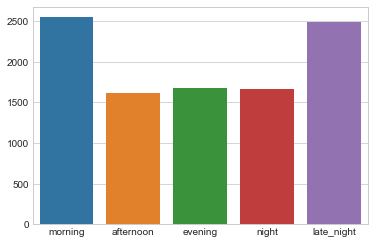

In [44]:
sns.barplot(x = ro_day_time_grp_cnt.index, 
            y=ro_day_time_grp_cnt.values, order = ['morning', 'afternoon', 
                                                   'evening' , 'night', 'late_night'])

In [33]:
# now that we have extracted features from date column we will drop recent_order_date column
raw_data.drop(labels=['recent_order_date', 'recent_order_time'], axis=1, inplace=True)

In [34]:
# we can now classify users based on how long they have been in our system. This was possible by
# taking the difference between the date columns

In [35]:
def get_user_type(x):
    if x <= 30:
        user_type = 'new_user'
    elif (x > 30) & (x <= 90):
        user_type = 'quite_sometime_user'
    else:
        user_type = 'old_user'
    return user_type

In [36]:
raw_data['user_type'] = raw_data.membership_days.apply(func=get_user_type)

In [38]:
user_type_grp_cnt = raw_data.user_type.value_counts()
user_type_grp_cnt
raw_data.user_type.value_counts(normalize=True)
# more than 50% of users are new users in the data

new_user               5418
old_user               2689
quite_sometime_user    1893
Name: user_type, dtype: int64

new_user               0.5418
old_user               0.2689
quite_sometime_user    0.1893
Name: user_type, dtype: float64

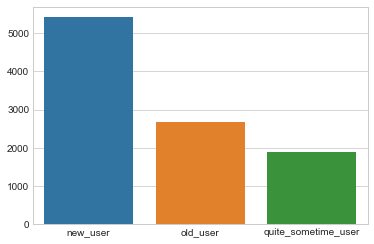

In [42]:
sns.barplot(x = user_type_grp_cnt.index, y = user_type_grp_cnt.values, estimator=np.median)